# LIGA IA Facens - 1ª competição

## Importações

Importando bibliotecas necessárias.

In [1]:
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

## Abrindo base de dados

Abrindo base de dados na variável `datas`.

In [2]:
datas = pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

## Analisando base de dados

### Distribuição

Vamos ver quais são as classes da base de dados e como elas estão distribuidas.

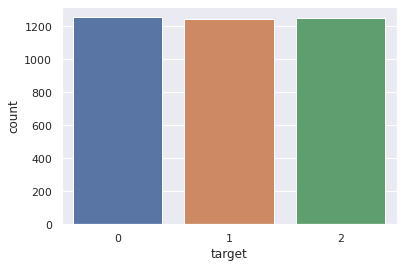

In [ ]:
sns.countplot(data=datas, x='target')
plt.show()

Como pode-se observar há três classes: 0, 1 e 2. As três estão distribuidas de forma uniforme.

### Distribuição de cada atribuito

Vamos verificar quais são os atributos da base e como estão distribuidos.

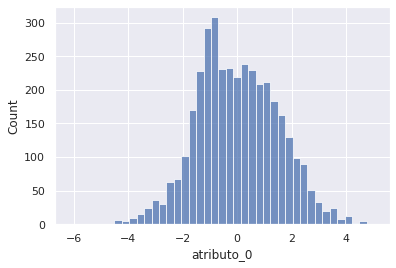

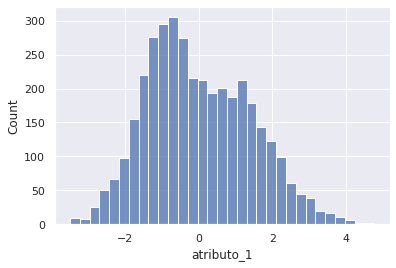

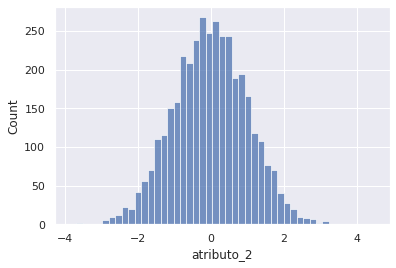

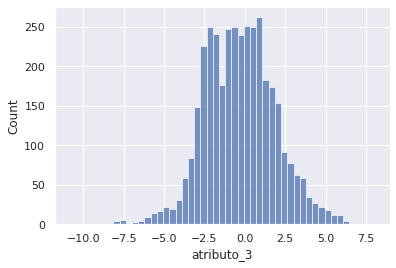

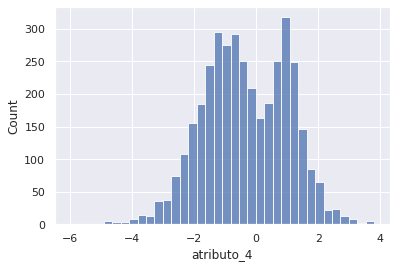

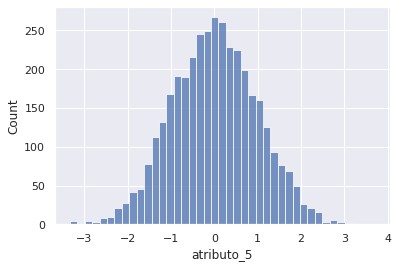

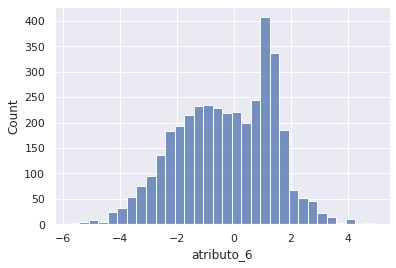

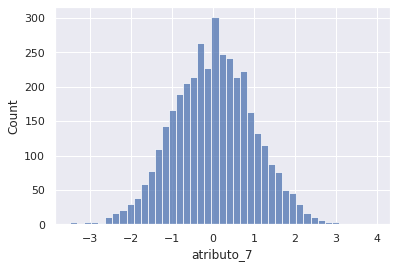

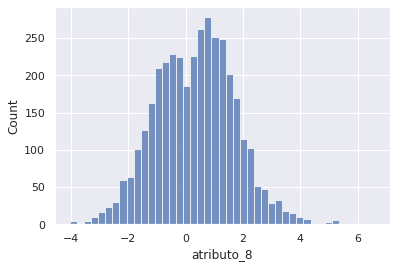

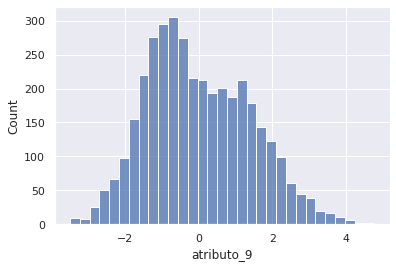

In [ ]:
for column in datas.drop(columns='target').columns:
  sns.histplot(data=datas, x=column)
  plt.show()

Há 10 atributos na base de dados, a maioria parece seguir uma distribuição próxima da normal, mas o `atributo_5` parece segui-la quase perfeitamente.

### Relacionando todos os atributos

Vamos usar um `pairplot` para relacionar todos os atributos.

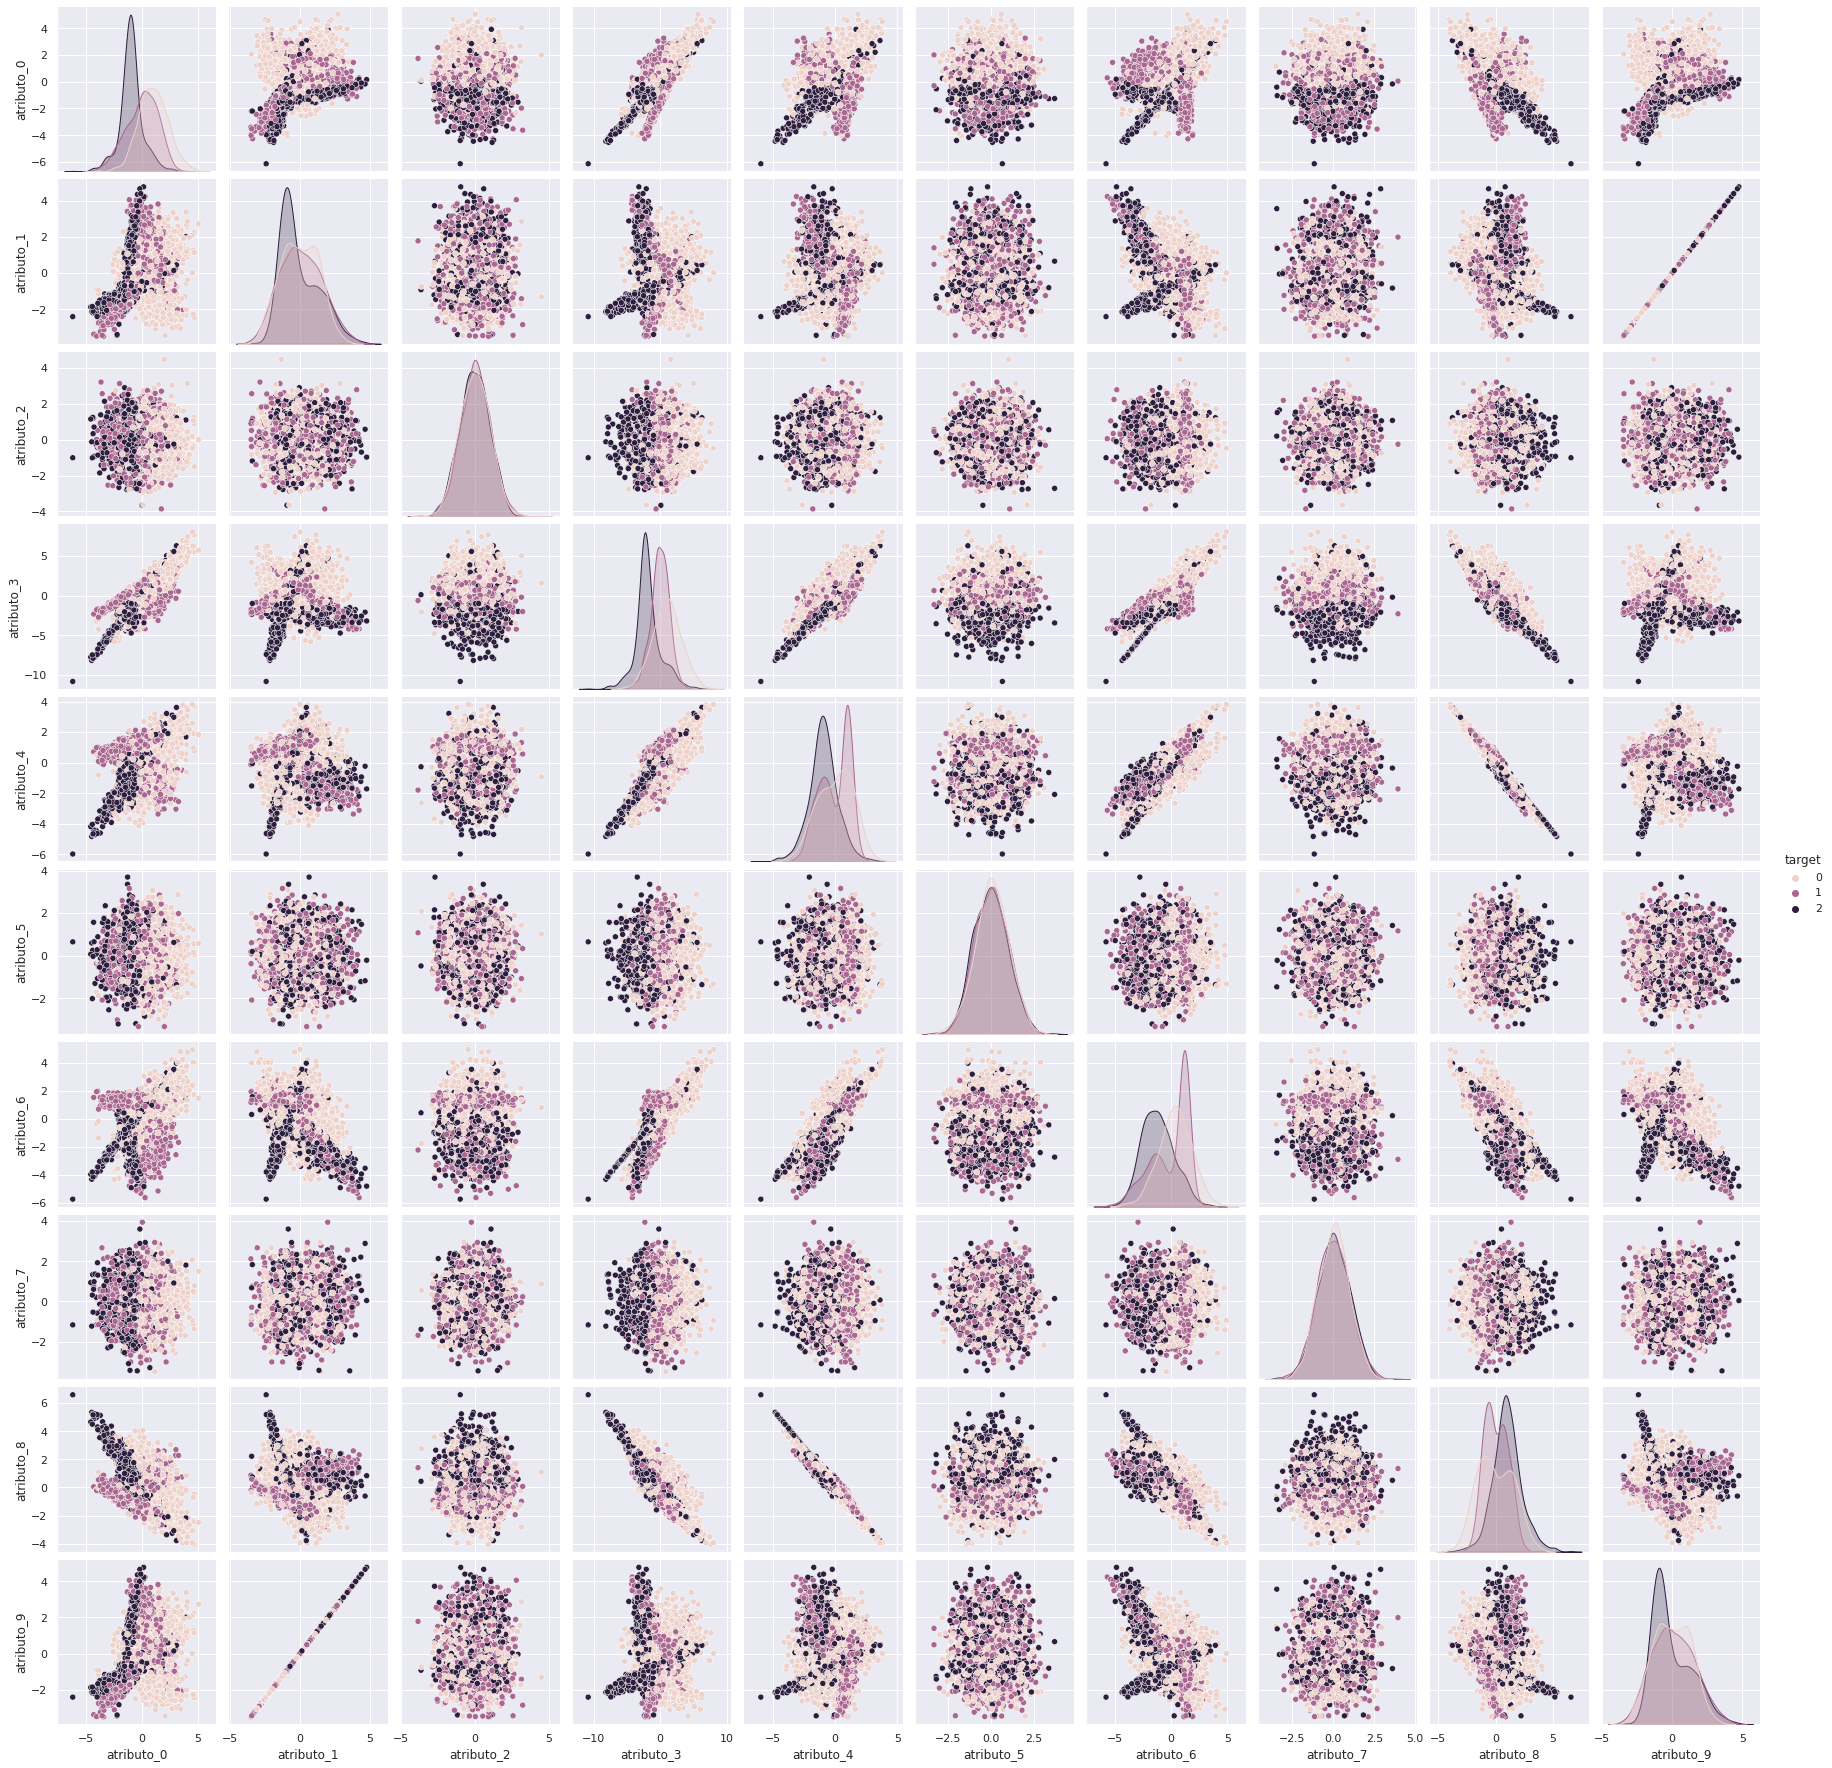

In [ ]:
sns.pairplot(data=datas, hue='target')
plt.show()

Observando os gráficos percebe-se que a classe 2 é a que parece mais fácil de "separar" das outras. Analisando a linha do `atributo_5` ele aparenta ser o que menos se relaciona as classes. 

Por fim os `atributos_1` e `atributo_9` parecem possuir valores identicos, vamos verificar isso fazendo uma média dos valores iguais.

In [ ]:
(datas['atributo_1'] == datas['atributo_9']).mean()

1.0

Assim conclui-se que os atributos são identicos.

### Calculando *mutual information*

Vamos calcular o *mutual information* que indica a correlação entre um atributo e o alvo, quanto maior o valor maior a correlação.

In [ ]:
X = datas.drop(columns=['atributo_9', 'target']) # Retirando o atributo_9 por ser duplicado.
y = datas['target']

In [ ]:
mi_score = mutual_info_classif(X, y)

In [ ]:
mi_score = pd.Series(mi_score, index=X.columns)
mi_score = mi_score.sort_values(ascending=False)

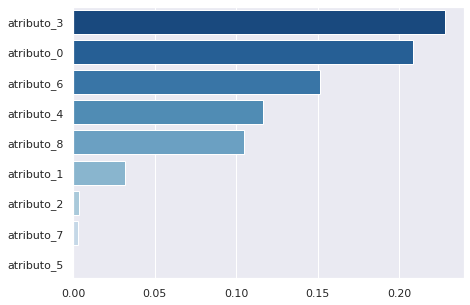

In [ ]:
plt.figure(figsize=(7, 5))
palette = sns.color_palette('Blues_r', 10)
sns.barplot(x=mi_score.values, y=mi_score.index, palette=palette)
plt.show()

Podemos observar que há atributos que possuem uma correlação muito baixa, como o 2 e 7, mas o `atributo_5` não possui nenhuma.

### Validação cruzada

Definindo função para calcular a validação cruzada.

In [ ]:
def cross_score(model, X, y):
  scores = cross_val_score(model, X, y, scoring='accuracy')
  return scores.mean()

## Testando modelos

Redefinindo os dados de treino, removendo os atributos de baixa correlação.

In [ ]:
X = datas.drop(columns=['atributo_9', 'atributo_5', 'atributo_2', 'atributo_7', 'target']) # Retirando o atributo_9 por ser duplicado.
y = datas['target']

Abaixo estão os modelos testados, com as configurações que resultaram em maior acurácia.

In [ ]:
model_dt = DecisionTreeClassifier(max_depth=10)

cross_score(model_dt, X, y)

0.8277333333333333

In [ ]:
model_kn = KNeighborsClassifier(n_neighbors=13)

cross_score(model_kn, X, y)

0.8485333333333334

In [ ]:
model_xgbc = XGBClassifier(random_state=0, max_depth=9, n_estimators=50)

cross_score(model_xgbc, X, y)

0.8615999999999999

In [ ]:
model_rf = RandomForestClassifier(random_state=0)

cross_score(model_rf, X, y) 

0.8642666666666667

In [ ]:
model_mlp = MLPClassifier(random_state=0, hidden_layer_sizes=950, max_iter=10000)

cross_score(model_mlp, X, y)

0.8810666666666667

Como pode-se observar o modelo com maior acurácia é a rede neural com 950 unidades na camada oculta.

## Gerando predições

Agora vamos gerar a predições para os dados do arquivo `test.csv`.

In [ ]:
model_mlp = MLPClassifier(random_state=0, hidden_layer_sizes=950, max_iter=10000)

model_mlp.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=700, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
test_datas = pd.read_csv('test.csv')

In [ ]:
X2 = test_datas.drop(columns=['atributo_9', 'atributo_5', 'atributo_2', 'atributo_7'])

In [ ]:
y_pred = model_mlp.predict(X2)

In [ ]:
prediction = pd.DataFrame(y_pred)
prediction.columns = ['Predicted']

In [ ]:
prediction.to_csv('predictions.csv')

As predições foram salvas no arquivo `predictions.csv`.